In [2]:
import openpyxl

In [3]:
import numpy

In [4]:
import seaborn as sns

In [5]:
import tensorflow as tf

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
cpi_data = pd.read_excel('CPI Inflation Data.xlsx')
cpi_data_np = np.array(cpi_data)

In [9]:
type(cpi_data)

pandas.core.frame.DataFrame

In [10]:
cpi_data.rename(columns={'name':"DATE"},inplace=True)

# cpi_data.head()
# list(cpi_data.columns)

In [11]:
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Columns: 127 entries, index date    to OTHER SERVICES (NEC)
dtypes: datetime64[ns](1), float64(107), int64(1), object(18)
memory usage: 416.8+ KB


# TASK 1:
- Create new dataframe with key columns
- use seaborn to plot relationships between columns

In [12]:
cpi_key_columns = ['DATE',
                   'CPIH ALL ITEMS',
                   'FOOD AND NON-ALCOHOLIC BEVERAGES',
                   'ALCOHOLIC BEVERAGES AND TOBACCO', 
                   'CLOTHING AND FOOTWEAR', 
                   'FURNITURE, HOUSEHOLD EQUIPMENT AND MAINTENANCE',
                  'HEALTH',
                   'TRANSPORT',
                   'ELECTRICITY, GAS AND OTHER FUELS',
                   'COMMUNICATION',
                   'RECREATION & CULTURE',
                   'EDUCATION',
                   'RESTAURANTS AND HOTELS',
                   'MISCELLANEOUS GOODS AND SERVICES'
                   ]


cpi_data_refined = cpi_data.filter(cpi_key_columns, axis=1)

In [13]:
# save data to csv
cpi_data_refined.to_csv('CPI Refined Data.csv', index=False)

In [14]:
cpi_data_refined.set_index('DATE', inplace=True)

In [15]:
# cpi_data_refined.head()

In [16]:
#create dataframe of date and cpih inflation rate
cpih_rate = cpi_data[['DATE','CPIH ALL ITEMS']]

# print(cpih_rate.loc[cpi_data['DATE'] == '2020-01-01'])
# drop covid dates
cpih_rate.drop(cpih_rate.index[384:], inplace=True)
print(cpih_rate.tail())


# print(cpih_rate['DATE'] == '2020-01-01')

cpih_rate.set_index('DATE',inplace=True)
cpih_rate = cpih_rate.asfreq('MS')
cpih_rate.info()

          DATE  CPIH ALL ITEMS
379 2019-08-01         108.301
380 2019-09-01         108.414
381 2019-10-01         108.285
382 2019-11-01         108.516
383 2019-12-01         108.520
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1988-01-01 to 2019-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CPIH ALL ITEMS  384 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


## check nan values in columns

In [17]:
# cpi_data_refined.isnull().sum()

# PLOTS

In [18]:
import matplotlib.pyplot as plt

# SMALL_SIZE = 10
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 16

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

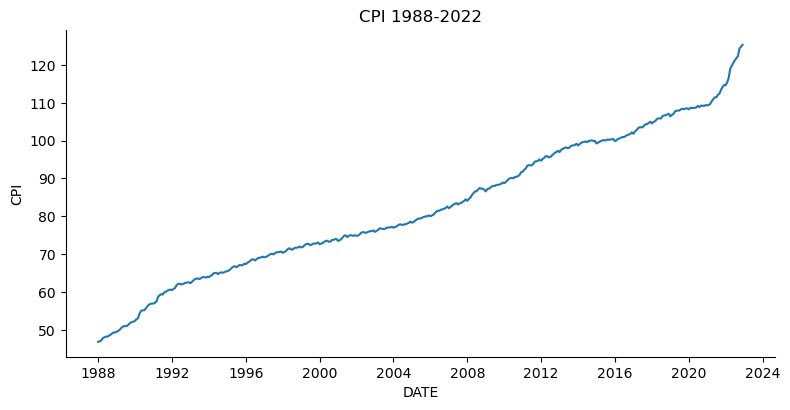

In [19]:
# show the relationship between CPIH and Time
ax = sns.relplot(data=cpi_data_refined, x='DATE', y='CPIH ALL ITEMS', kind='line', height=4, aspect=2)
ax.set(xlabel='DATE', ylabel='CPI', title="CPI 1988-2022")

plt.show()

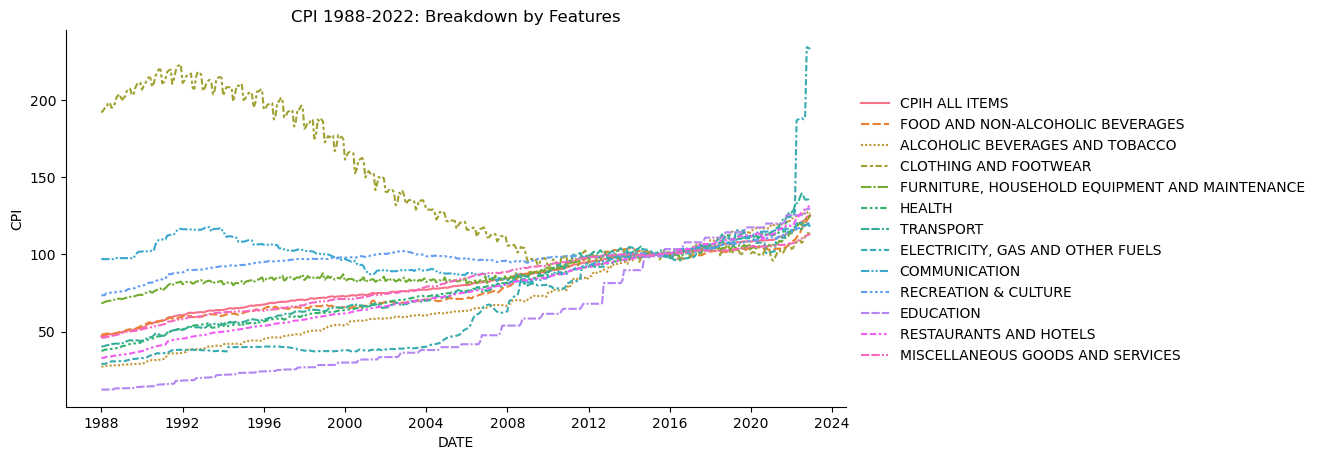

In [20]:
# plt.figure(figsize=(10, 5))
# plt.rcParams.update({'font.size': 16})

sns.relplot(data=cpi_data_refined, kind='line', height=4.5, aspect=2, legend='full')
# leg = g._legend
# leg.set_bbox_to_anchor([0.25,0.5,1, 0.5])  # coordinates of lower left of bounding box
# leg._loc = 2

plt.title("CPI 1988-2022: Breakdown by Features",)
# plt.legend(loc='lower center')
plt.xlabel('DATE')
plt.ylabel('CPI')

# g.move_legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)
# sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.show()

In [21]:
cpi_variables = cpi_key_columns[2:]
date_variable = cpi_key_columns[0]


In [22]:
# ax = sns.relplot(data=cpih_rate, x='DATE', y="CPIH ALL ITEMS", kind='line', height=4, aspect=2)
# ax.set(xlabel='DATE', ylabel='CPI', title="CPI 1988-2019")

# plt.show()

## Box plots for outliers

In [23]:
# for i,col in enumerate(cpi_variables):
#     plt.figure()   # plots figure for each iteration
#     plt.boxplot(cpi_data_refined[col])
#     plt.xlabel(col)
#     plt.ylabel('CPI')

In [24]:
# sns.set(style="ticks", palette="pastel")
# sns.boxplot(data=cpi_data_refined, orient="v", width=0.5, linewidth=1.5, fliersize=3, saturation=0.7)
# sns.despine(left=True)

# # Add titles and labels to the plot
# plt.title("CPI 1988-2022: Breakdown by Features")
# plt.ylabel("CPI")
# plt.xticks(rotation=90)
# plt.show()

#### THOUGHTS

- Recreation and Culture has a lot of outliers.

# Histogram to show distrubution

In [25]:
# for i,col in enumerate(cpi_variables):
#     plt.figure()   # plots figure for each iteration
#     plt.hist(cpi_data_refined[col])
#     plt.xlabel(col)
#     plt.ylabel('CPI')

In [26]:
# sns.set(style="ticks", palette="pastel")
# sns.histplot(data=cpi_data_refined, kde=True, bins=20, alpha=0.7, multiple="stack")

# # Add titles and labels to the plot
# plt.title("CPI 1988-2022: Breakdown by Features")
# plt.xlabel("CPIand ")
# plt.ylabel("Frequency")
# plt.show()

### THoughts

- Data doesnt follow normal distribution, so any statitsical methods that assume normal distribuiton cant be used

# CPI AGAINST TIME FOR VARIABLES

In [27]:
# for i,col in enumerate(cpi_variables):
#     plot = sns.relplot(data=cpi_data_refined, x='DATE', y=col, kind='line', height=4, aspect=2)
#     plot.set(ylim=(0, 220))
    
# # set limits on y axis so its uniform for all plots
# # have date labels appear vertically to save space



##### TO DO

- evaluation section in latex
- ask mohamad if i caN consider weights given by dataset or assign them randomly 
- monte carlo simulation stuff

In [28]:
cpih_rate.tail()

,CPIH ALL ITEMS
DATE,
2019-08-01,108.301
2019-09-01,108.414
2019-10-01,108.285
2019-11-01,108.516
2019-12-01,108.520


## TIME SERIES DECOMPOSITION

In [29]:
# # show the relationship between CPIH and Time
# sns.relplot(data=cpi_data_refined, x='DATE', y='CPIH ALL ITEMS', kind='line', height=4, aspect=2)

## Moving Average Plot

In [30]:
# train_size = int(len(cpih_rate) * 0.8)  # adjust the training size as needed
# train_data, val_data = cpih_rate[:train_size], cpih_rate[train_size:]

window_size = 12
rolling_avg = cpih_rate.rolling(window_size).mean()

In [31]:
# plt.rcParams['figure.figsize'] = [12, 4]
# plt.plot(cpih_rate, label='CPI')
# plt.plot(rolling_avg, label=f'{window_size}-day Moving Average')
# plt.legend()
# plt.xlabel('Year')
# plt.ylabel('CPI')
# plt.title('Moving Average Plot')
# plt.show()

# Detrending Plot

In [32]:
# detrended = cpih_rate / rolling_avg
# plt.plot(detrended)
# plt.show()

### Additive Decomposition

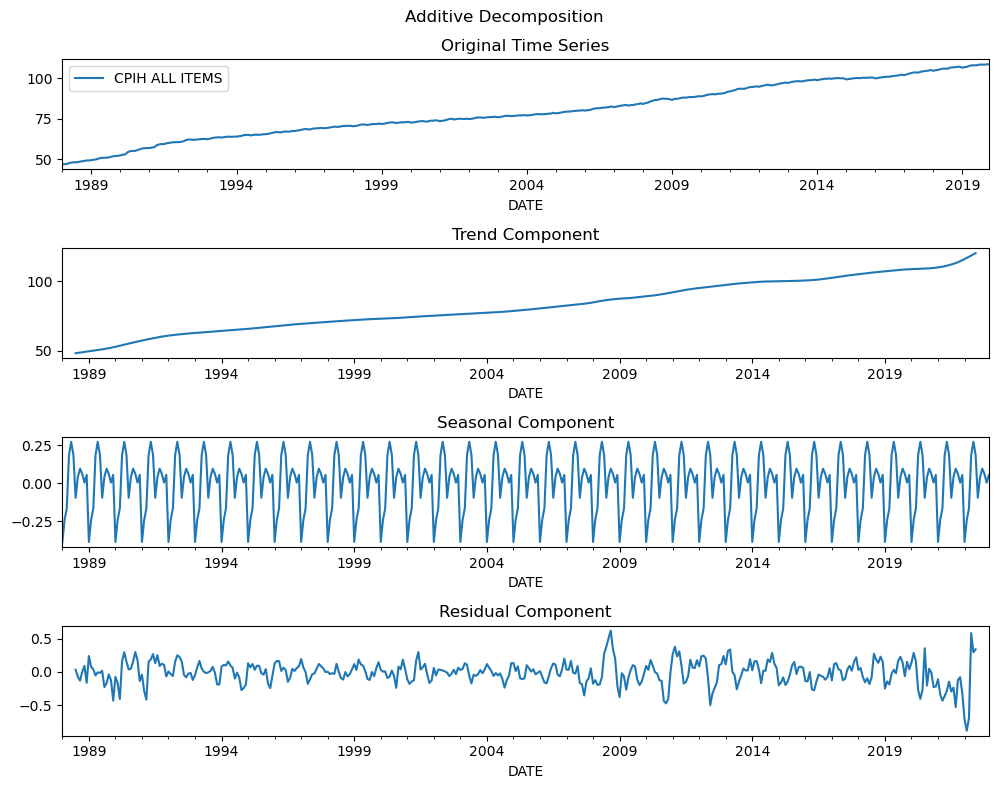

In [33]:
from matplotlib import rcParams
from scipy.fftpack import fftfreq
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomp = sm.tsa.seasonal_decompose(cpi_data_refined['CPIH ALL ITEMS'], model='additive', period=12)
# fig = decomposition.plot()

# plt.show()


fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
fig.suptitle("Additive Decomposition")
cpih_rate.plot(ax=ax[0], title='Original Time Series')
decomp.trend.plot(ax=ax[1], title='Trend Component')
decomp.seasonal.plot(ax=ax[2], title='Seasonal Component')
decomp.resid.plot(ax=ax[3], title='Residual Component')
plt.tight_layout()
plt.show()

# fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
# cpih_rate.plot(ax=ax[0], title='Original Time Series')
# res.trend.plot(ax=ax[1], title='Trend Component')
# res.seasonal.plot(ax=ax[2], title='Seasonal Component')
# res.resid.plot(ax=ax[3], title='Residual Component')
# plt.tight_layout()
# plt.show()

In [34]:
# decomp.seasonal.plot()

### Multiplicative Decomposition

In [35]:
# rcParams['figure.figsize'] = 12,8
# decomposition = sm.tsa.seasonal_decompose(cpi_data_refined['CPIH ALL ITEMS'], model='mutlipicative', period=12)
# fig = decomposition.plot()
# plt.show()

- trend is larger level direction of data
- seasonal is periodic pattern in data
- residual around 0 is good - WHY?


- additive model: seasonality is independent of trend, multiplicative model: seasonsality directly proportional to trend 

### STL Decomposition

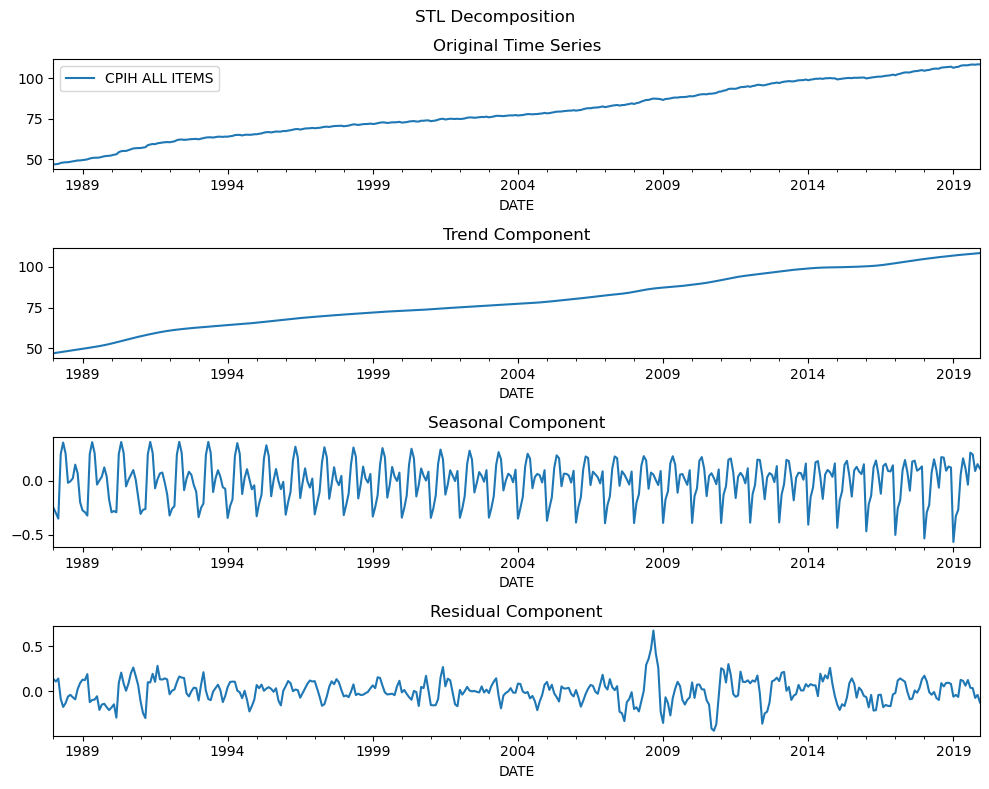

In [36]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(cpih_rate, seasonal=13) # 13 is the seasonal periodicity, can be adjusted based on the data
res = stl.fit()
# res.plot()

# Plot the original time series and its components
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
fig.suptitle("STL Decomposition")
cpih_rate.plot(ax=ax[0], title='Original Time Series')
res.trend.plot(ax=ax[1], title='Trend Component')
res.seasonal.plot(ax=ax[2], title='Seasonal Component')
res.resid.plot(ax=ax[3], title='Residual Component')
plt.tight_layout()
plt.show()


In [37]:
# res.seasonal.plot()

In [38]:
# np.exp(res.seasonal).plot()

cpi_data_refined = pd.read_csv('CPI Refined Data.csv', parse_dates={'Date':['DATE']})

In [39]:
# cpi_data_refined.columns

In [40]:
# # create df of just independent variables
# df_independent_variables = cpi_data_refined.drop(['CPIH ALL ITEMS'],axis=1)
# df_independent_variables.head()

## Transformation and Differencing (stationarity)
####  Time series is stationary if:

- average / mean of time series is constant throughout different periods
- standard dev / variance of time series is constant throughout different periods
- no seasonality in data

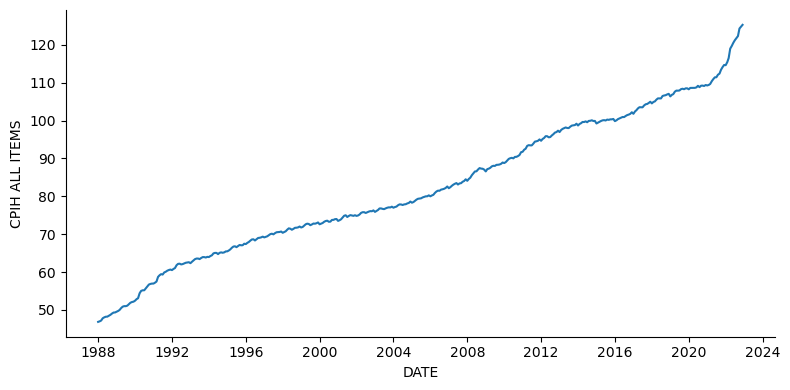

In [41]:
sns.relplot(data=cpi_data_refined, x='DATE', y='CPIH ALL ITEMS', kind='line', height=4, aspect=2)

- not stationary because average is not constant throughout data

IN REPORT:
- show example of ideal stationary data and explain why this data isnt stationary

# Correlation

serial corrlation article : https://www.quantstart.com/articles/Serial-Correlation-in-Time-Series-Analysis/#:~:text=The%20serial%20correlation%20or%20autocorrelation,%CF%83%202%20%CF%83%202%20%3D%201%20.

#### TO DO

- check if time series is second-order stationary:
        plot time series [DONE earlier]
        compute descriptive statistics [DONE]
        calculate autocorrelation 
        augmented dickey-fuller [done]
        


In [42]:
#cpi_data_refined.describe()
# df_independent_variables.describe()

## Augmented Dickey Fuller Test
Used to test if time series data is stationary, if it is we can have more accurate autocorrelation results

In [43]:
#import required library
from statsmodels.tsa.stattools import adfuller

In [44]:
def adf_test(df):
    result = adfuller(df.values)
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")


In [45]:
cpih_rate.tail()

,CPIH ALL ITEMS
DATE,
2019-08-01,108.301
2019-09-01,108.414
2019-10-01,108.285
2019-11-01,108.516
2019-12-01,108.520


In [46]:
adf_test = adfuller(cpih_rate["CPIH ALL ITEMS"])

In [47]:
print("ADF Statistic: %f" % adf_test[0])
print("p-value: %f" % adf_test[1])
print("Critical Values:")
for key, value in adf_test[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -0.774365
p-value: 0.826537
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


The data is non-stationary as the p-value is > 0.05

## KPSS Test

Another stationary test

https://www.statology.org/kpss-test-in-python/

In [48]:
import statsmodels.api as sm

In [49]:
kpss_test = sm.tsa.stattools.kpss(cpih_rate['CPIH ALL ITEMS'], regression='ct')

C:\Users\baile\.conda\envs\InflationProject\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [50]:
print("KPSS Statistic: %f" % kpss_test[0])
print("p-value: %f" % kpss_test[1])
print("Critical Values:")
for key, value in kpss_test[3].items():
    print("\t%s: %.3f" % (key, value))

KPSS Statistic: 0.296616
p-value: 0.010000
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


p-value < 0.05 therefore non-stationary

In [51]:
# 80% for training , 20% for testing

# last 5 data points are unseen data

# train_len = 336

split_point = len(cpih_rate) - 12
print(split_point)
# train, test = df_cpi[0:split_point], df_cpi[split_point:]


# train_cpi = cpih_rate[0:split_point]
test_cpi = cpih_rate[split_point:]

# print(len(train_cpi))


# # train_cpi_boxcox = cpi_boxcox[:train_len]
# # test_cpi_boxcox = cpi_boxcox[train_len:]

# train_cpi_boxcox_diff = cpi_boxcox_diff[0:split_point]
# test_cpi_boxcox_diff = cpi_boxcox_diff[split_point:]

# print(type(cpi_boxcox_diff))

372


# STATIONARITY : DIFFERENCING

Situation:
1. TS thats not stationary
2. transformation/differencing on TS -> makes TS stationary
3. model stationary data using time series models
4. predict new values on transformed TS
5. reverse transform TS back to original data

### Differencing to remove trend

In [52]:
diff_df = pd.DataFrame(index=cpih_rate.index)
diff_df['original_cpi'] = cpih_rate
diff_df['first_diff'] = cpih_rate.diff()
diff_df['second_diff'] = diff_df['first_diff'].diff()
diff_df.head()

,original_cpi,first_diff,second_diff
DATE,,,
1988-01-01,46.851,NaN,NaN
1988-02-01,46.998,0.147,NaN
1988-03-01,47.202,0.204,0.057
1988-04-01,47.801,0.599,0.395
1988-05-01,48.044,0.243,-0.356


In [53]:
# FIRST DIFFERENCING
copy_first_diff = diff_df['first_diff'].dropna()
# copy_second_diff = diff_df['second_diff'].dropna()
adf_test2 = adfuller(copy_first_diff)
print("ADF Statistic: %f" % adf_test2[0])
print("p-value: %f" % adf_test2[1])
print("Critical Values:")
for key, value in adf_test2[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -2.828845
p-value: 0.054270
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


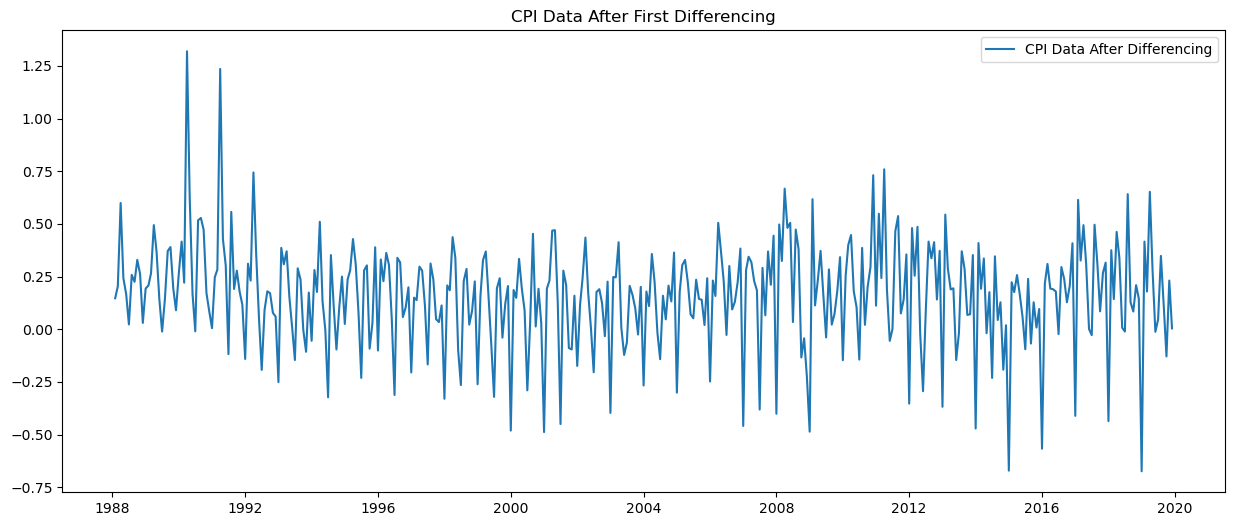

In [54]:
plt.figure(figsize=(15,6))
plt.plot(copy_first_diff, label='CPI Data After Differencing')
plt.legend(loc='best')
plt.title('CPI Data After First Differencing')
plt.show()

In [55]:
# SECOND DIFFERENCING

copy_second_diff = diff_df['second_diff'].dropna()
adf_test2 = adfuller(copy_second_diff)
print("ADF Statistic: %f" % adf_test2[0])
print("p-value: %f" % adf_test2[1])
print("Critical Values:")
for key, value in adf_test2[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -8.748002
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


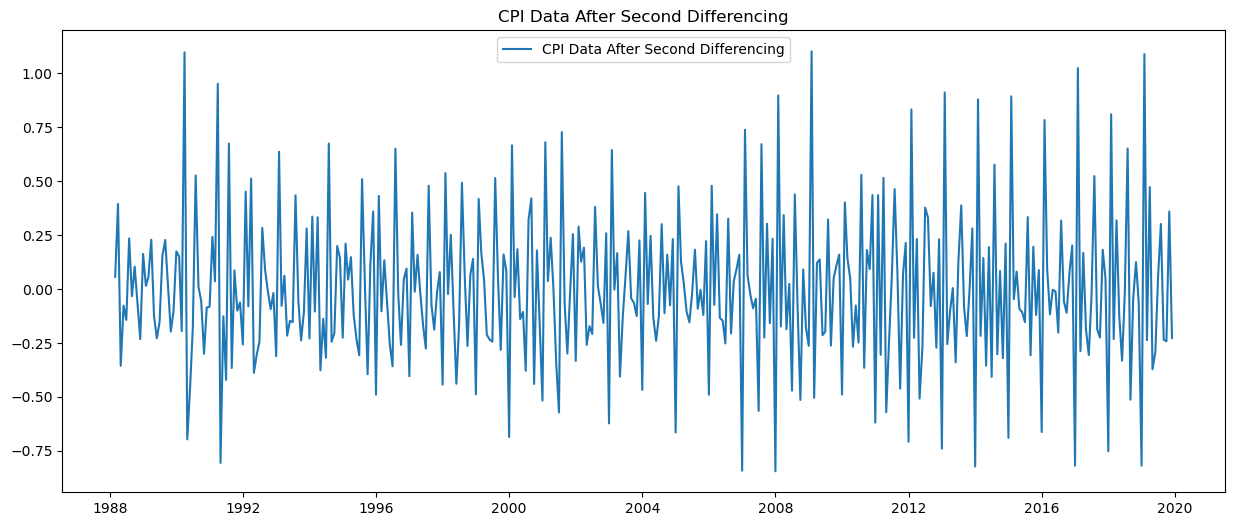

In [56]:
plt.figure(figsize=(15,6))
plt.plot(copy_second_diff, label='CPI Data After Second Differencing')
plt.legend(loc='best')
plt.title('CPI Data After Second Differencing')
plt.show()

In [57]:
# ACF PLOT
from statsmodels.graphics.tsaplots import plot_acf

In [58]:
# PACF PLOT
from statsmodels.graphics.tsaplots import plot_pacf

# ARIMA IMPLEMENTATION

## Grid Search to find optimal p,q values

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=283.862, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=183.758, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=35.461, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=37.277, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37.030, Time=0.17 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.065 seconds


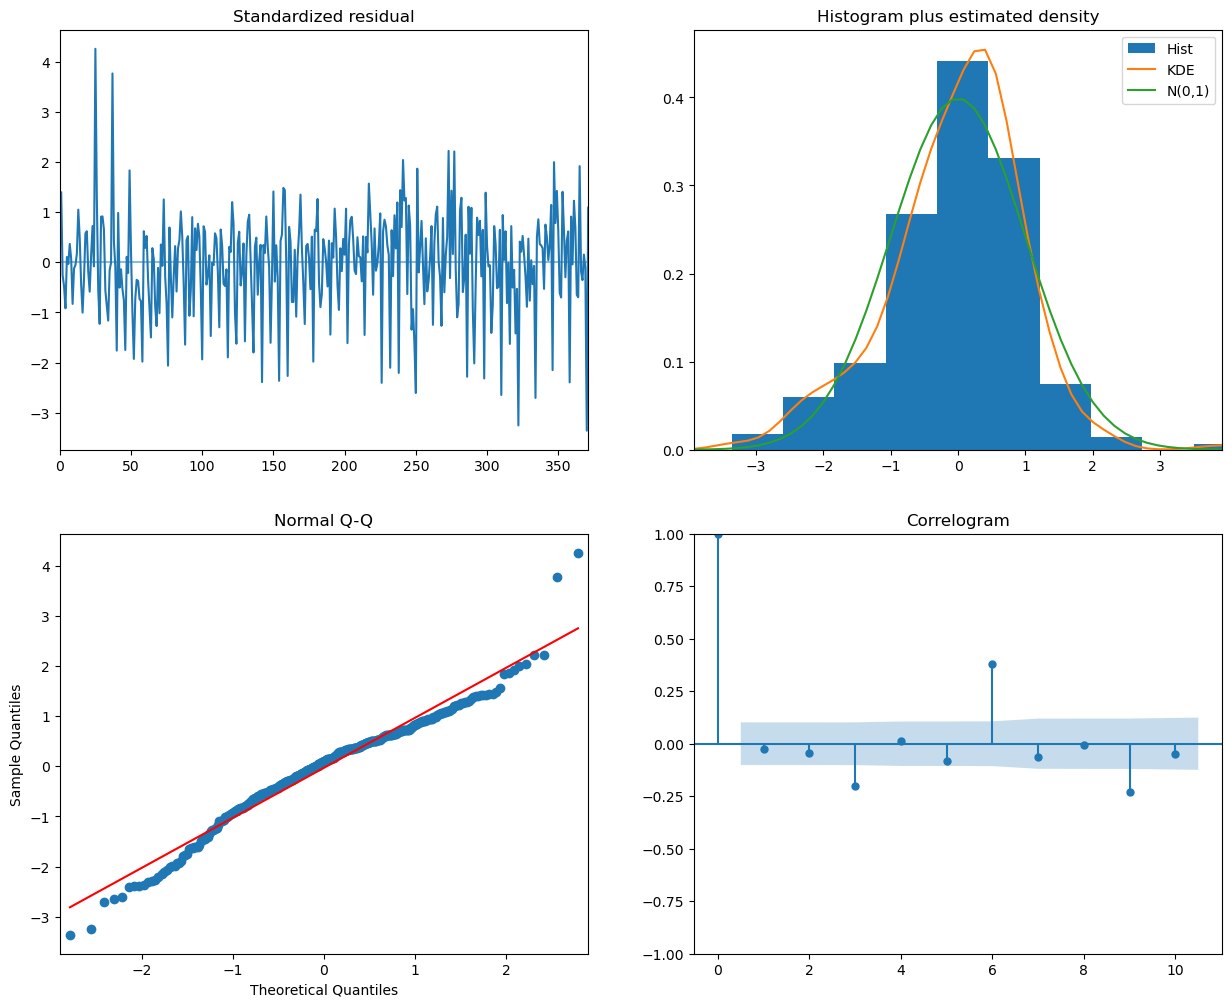

In [59]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


# stepwise_fit = auto_arima(cpi_boxcox_diff, trace=True, supress_warnings=True, trend='c')
stepwise_fit = auto_arima(copy_second_diff[0:split_point], trace=True, supress_warnings=True,seasonal=False)
stepwise_fit.summary()

# residual diagnostics
stepwise_fit.plot_diagnostics(figsize=(15,12))
plt.show()

## Fitting the model

In [60]:
# WE KNOW ORDER OF DIFFERENCE = 2
# FIT ARIMA MODEL WITH NORMAL DATA SET AND SET ORDER OF DIFFERENCE TO 2


# fit model
model = ARIMA(cpih_rate[0:split_point], order=(0,2,1))
# model = ARIMA(cpi_boxcox_diff, order=(1,0,2), trend='c')
model_fit = model.fit()
# one-step out-of sample forecast
arima_forecast = model_fit.forecast(steps=12)


# forecast = inverse_difference(X, forecast, shift)
print('Forecast:', arima_forecast)

Forecast: 2019-01-01    107.237784
2019-02-01    107.409568
2019-03-01    107.581352
2019-04-01    107.753136
2019-05-01    107.924920
2019-06-01    108.096704
2019-07-01    108.268489
2019-08-01    108.440273
2019-09-01    108.612057
2019-10-01    108.783841
2019-11-01    108.955625
2019-12-01    109.127409
Freq: MS, Name: predicted_mean, dtype: float64


# Forecast Diagram

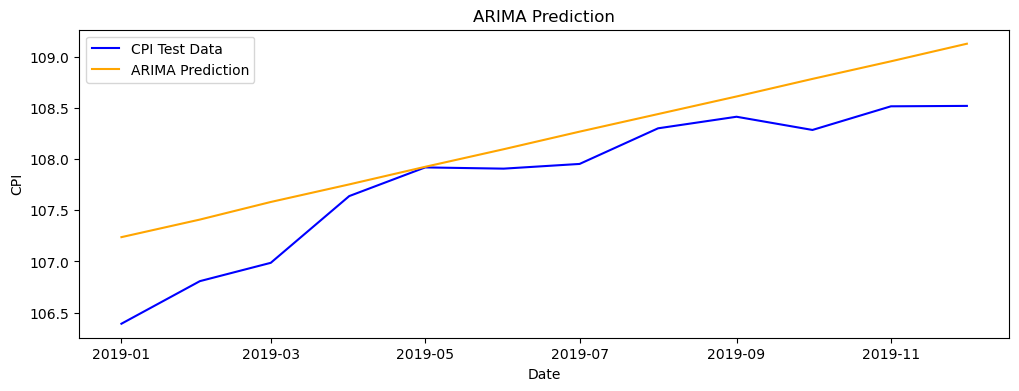

In [61]:
plt.figure(figsize=(12,4))
# plt.plot(cpih_rate.loc['2015-01-01':], label='CPI Training Data',color='orange')
plt.plot(test_cpi, label='CPI Test Data', color='blue')
# plt.plot(y_hat_ar['ar_forecast'][test_cpi.index.min():], label='ARIMA Forecast')
# plt.plot(y_hat_ar['ar_forecast'], label='ARIMA Forecast')
plt.plot(arima_forecast, label='ARIMA Prediction', color='orange')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(loc='best')
plt.title('ARIMA Prediction')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse = mean_squared_error(test_cpi, arima_forecast).round(2)
rmse = np.sqrt(mean_squared_error(test_cpi,arima_forecast)).round(2)
mae = mean_absolute_error(test_cpi, arima_forecast).round(2)
print("MSE is: ", mse)
print("RMSE is: ", rmse)
print("MAE is: ", rmse)


MSE is:  0.2
RMSE is:  0.45
MAE is:  0.45


### using diff function

In [63]:
# # cpi_boxcox_diff = pd.Series(cpi_boxcox - cpi_boxcox.shift(), cpih_rate.index)

# # create a differenced series
# def difference(dataset, interval):
    
#     diff = list()
#     for i in range(interval, len(dataset)):
#         value = dataset[i] - dataset[i - interval]
# #         print(value)
#         diff.append(value)
#     return numpy.array(diff)
 
# # invert differenced value
# def inverse_difference(history, yhat, interval=1):
#      return yhat + history[-interval]
    
# X = cpih_rate.values
# # print(len(X))
# shift = 1
# differenced = difference(X, shift)

# # print(X[0], X[1])
# # print(differenced[0], differenced[1])
# print(len(cpi_boxcox_diff))
# print(len(differenced))

### Stationary Test : ADF
- re-run adf to see if data is stationary

p-value less than 0.05. data is now stationary.

## ARIMA

### Determine paramters of ARIMA(p,d,q)

- we alr have d
- we need top compute p (order of autoregressive model)
    - inspect auto correlation plot measure corr between time ceries data and lag)
    - based on precense/absence of correlation, detertmine if lag order needed or not.

## SARIMA

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

sarima_model = auto_arima(copy_second_diff[0:split_point], trace=True, supress_warnings=True, seasonal=True, m=12)
sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=285.860, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-176.169, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-145.451, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=283.862, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=185.757, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=-197.580, Time=0.94 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=-238.074, Time=1.55 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-228.769, Time=0.43 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=-238.787, Time=1.79 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=-240.127, Time=1.86 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=-65.218, Time=0.44 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-10.737, Time=0.24 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=-154.565, Time=1.17 sec
 ARIMA(2,0,0)(1,0,2)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  372
Model:             SARIMAX(4, 0, 1)x(2, 0, [1, 2], 12)   Log Likelihood                 178.914
Date:                                 Mon, 01 May 2023   AIC                           -337.828
Time:                                         17:05:36   BIC                           -298.639
Sample:                                              0   HQIC                          -322.265
                                                 - 372                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1807      0.056      3.235      0.001       0.071       0.290
ar.L2          0.0654      0.049      1.342      0.180      -0.030       0.161
ar.L3          0.0818      0.054      1.523      0.128      -0.024       0.187
ar.L4          0.0675      0.048      1.415      0.157      -0.026       0.161
ma.L1         -0.9869      0.010   -103.014      0.000      -1.006      -0.968
ar.S.L12       0.5364      0.090      5.940      0.000       0.359       0.713
ar.S.L24       0.4466      0.090      4.987      0.000       0.271       0.622
ma.S.L12      -0.1176      0.080     -1.477      0.140      -0.274       0.038
ma.S.L24      -0.5143      0.070     -7.300      0.000      -0.652      -0.376
sigma2         0.0209      0.001     15.256      0.000       0.018       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                52.29
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.14
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

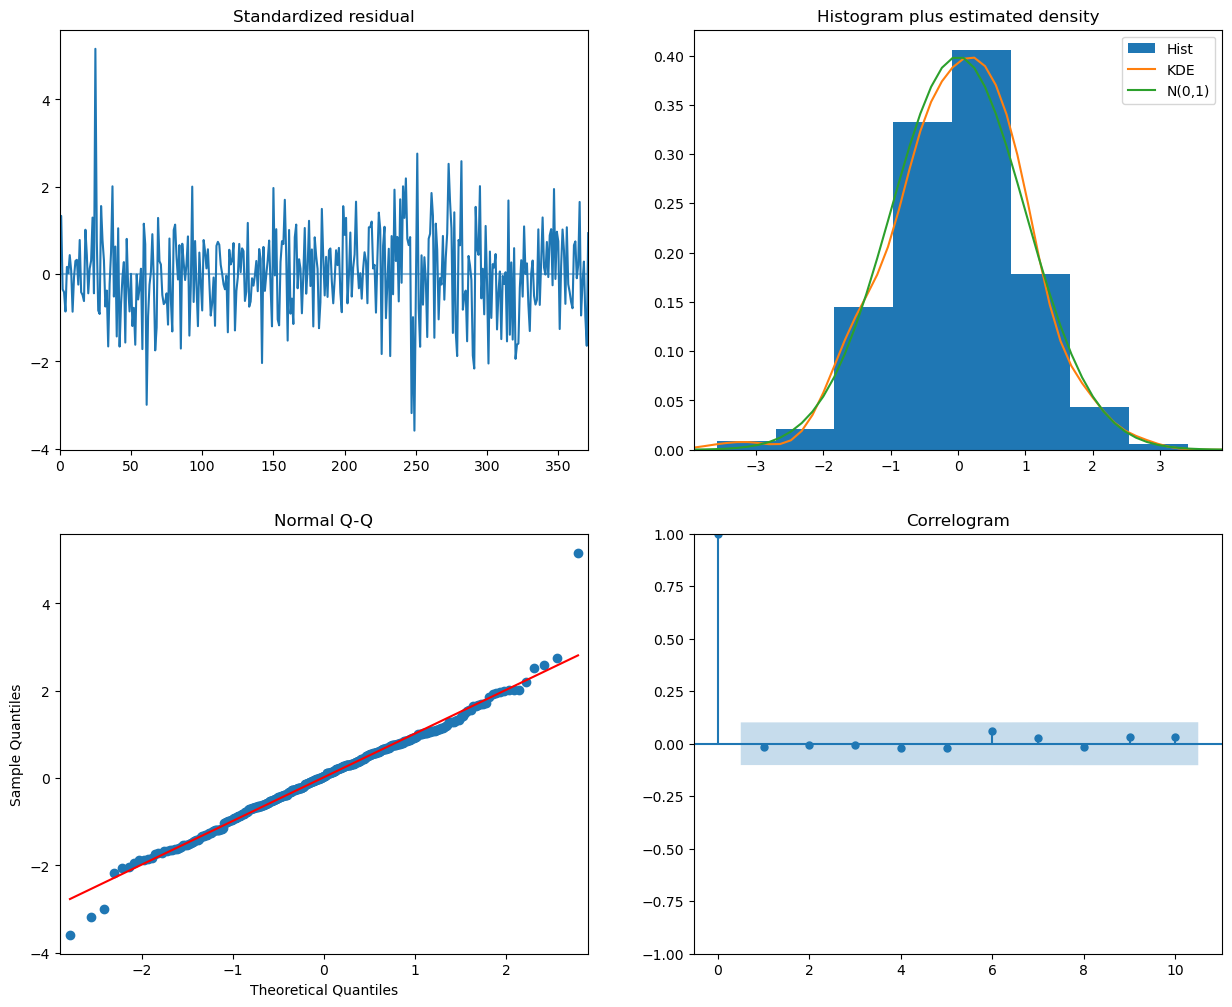

In [65]:
sarima_model.plot_diagnostics(figsize=(15,12))
plt.show()

# Fit SARIMA


In [66]:
# WE KNOW ORDER OF DIFFERENCE = 2
# FIT ARIMA MODEL WITH NORMAL DATA SET AND SET ORDER OF DIFFERENCE TO 2

# fit model
sarima_model = SARIMAX(cpih_rate[0:split_point], order=(4,2,1), seasonal_order=(2,0,2,12))
# model = ARIMA(cpi_boxcox_diff, order=(1,0,2), trend='c')
sarima_model_fit = sarima_model.fit()
# one-step out-of sample forecast
sarima_forecast = sarima_model_fit.forecast(steps=12)


# forecast = inverse_difference(X, forecast, shift)
print('Forecast:', sarima_forecast)

Forecast: 2019-01-01    106.636338
2019-02-01    106.957954
2019-03-01    107.147023
2019-04-01    107.506105
2019-05-01    107.731181
2019-06-01    107.783661
2019-07-01    107.740204
2019-08-01    108.186115
2019-09-01    108.339138
2019-10-01    108.454201
2019-11-01    108.592920
2019-12-01    108.812090
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\baile\.conda\envs\InflationProject\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


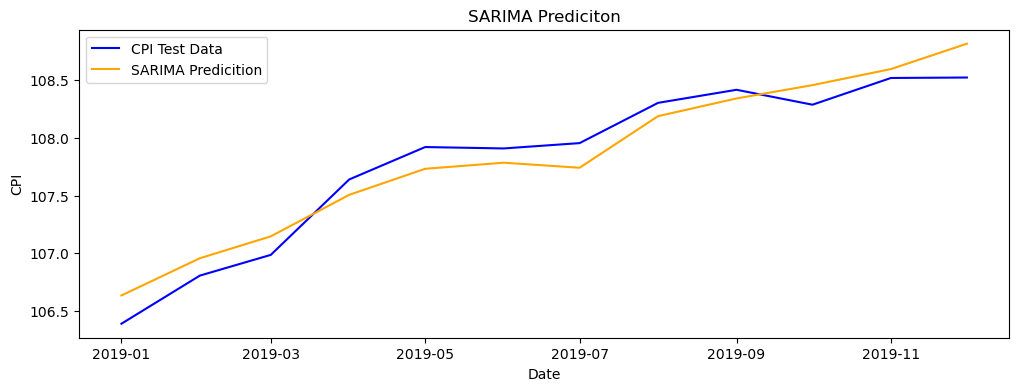

In [67]:
plt.figure(figsize=(12,4))
# plt.plot(cpih_rate.loc['2015-01-01':], label='CPI Train Data', color='orange')
plt.plot(test_cpi, label='CPI Test Data', color='blue')
# plt.plot(y_hat_ar['ar_forecast'][test_cpi.index.min():], label='ARIMA Forecast')
# plt.plot(y_hat_ar['ar_forecast'], label='ARIMA Forecast')
plt.plot(sarima_forecast, label='SARIMA Predicition', color='orange')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(loc='best')
plt.title('SARIMA Prediciton')
plt.show()

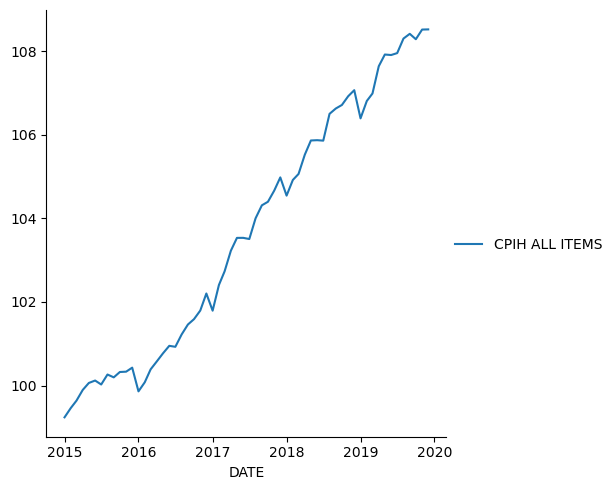

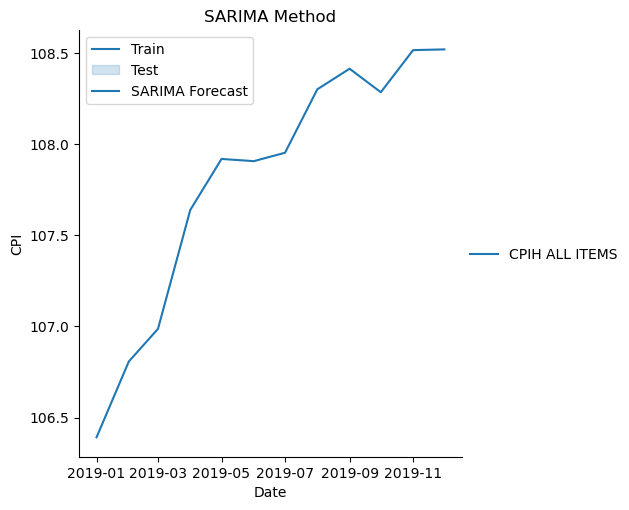

In [68]:
# plt.figure(figsize=(12,4))
sns.relplot(cpih_rate.loc['2015-01-01':],kind='line')
sns.relplot(test_cpi,kind='line')
# sns.lineplot(sarima_forecast)
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(['Train', 'Test', 'SARIMA Forecast'])
plt.title('SARIMA Method')
plt.show()



In [70]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse = mean_squared_error(test_cpi, sarima_forecast).round(2)
rmse = np.sqrt(mean_squared_error(test_cpi,sarima_forecast)).round(2)
mae = mean_absolute_error(test_cpi, sarima_forecast).round(2)
print("MSE is: ", mse)
print("RMSE is: ", rmse)
print("MAE is: ", rmse)



MSE is:  0.03
RMSE is:  0.17
MAE is:  0.17


In [124]:
# sarima_model_fit.resid

In [125]:
# train_resid = sarima_model.resid[:train_len]
# valid_resid = sarima_model.resid[train_len:]

# # Calculate the Mean Absolute Error (MAE) for the training and validation sets
# train_mae = np.mean(np.abs(train_resid))
# valid_mae = np.mean(np.abs(valid_resid))

# # Calculate the Root Mean Squared Error (RMSE) for the training and validation sets
# train_rmse = np.sqrt(np.mean(np.square(train_resid)))
# valid_rmse = np.sqrt(np.mean(np.square(valid_resid)))

# print(f'Training MAE: {train_mae:.3f}, Training RMSE: {train_rmse:.3f}')
# print(f'Validation MAE: {valid_mae:.3f}, Validation RMSE: {valid_rmse:.3f}')


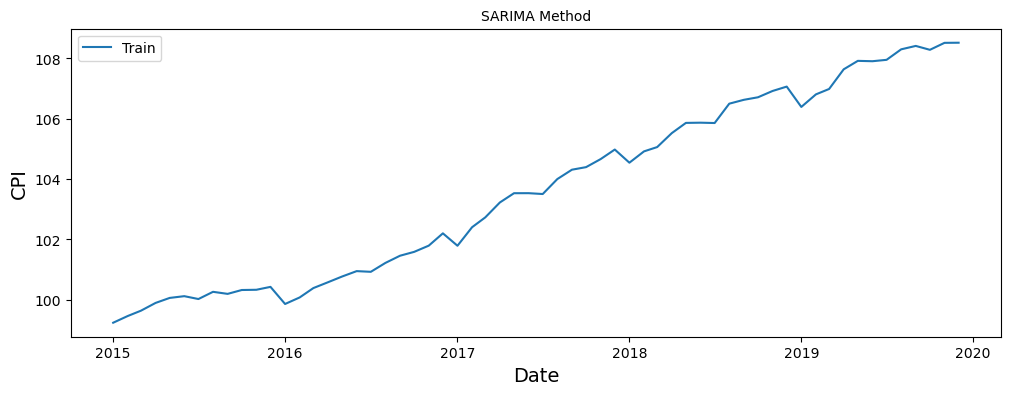

In [126]:
plt.figure(figsize=(12,4))
plt.plot(cpih_rate.loc['2015-01-01':], label='Train', alpha=1,)

plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(loc='best')
plt.title('SARIMA Method')
plt.show()